# COMPREHENSIVE DATA EXPLORATION WITH PYTHON
[Xinyue Niu](http://pmarcelino.com) - Jan 2019

----------

loading packages

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

load data

In [24]:
df=pd.read_csv('NY property data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070994 entries, 0 to 1070993
Data columns (total 32 columns):
RECORD      1070994 non-null int64
BBLE        1070994 non-null object
B           1070994 non-null int64
BLOCK       1070994 non-null int64
LOT         1070994 non-null int64
EASEMENT    4636 non-null object
OWNER       1039249 non-null object
BLDGCL      1070994 non-null object
TAXCLASS    1070994 non-null object
LTFRONT     1070994 non-null int64
LTDEPTH     1070994 non-null int64
EXT         354305 non-null object
STORIES     1014730 non-null float64
FULLVAL     1070994 non-null float64
AVLAND      1070994 non-null float64
AVTOT       1070994 non-null float64
EXLAND      1070994 non-null float64
EXTOT       1070994 non-null float64
EXCD1       638488 non-null float64
STADDR      1070318 non-null object
ZIP         1041104 non-null float64
EXMPTCL     15579 non-null object
BLDFRONT    1070994 non-null int64
BLDDEPTH    1070994 non-null int64
AVLAND2     282726 non-null fl

check the decoration

 It is an unsupervised learning and there is not target value. 

Using heatmap to see correlations between each field.

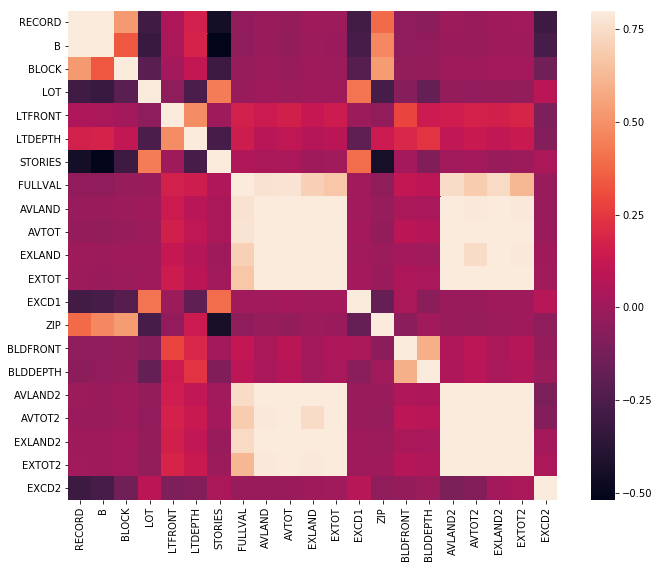

In [4]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

'FULLVAL', 'AVLAND','AVTOT', 'EXLAND', 'EXTOT','AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2' are highly correlated

'RECORD' and 'B' are highly correlated

In [ ]:
#scatterplot
sns.set()
cols = ['FULLVAL', 'AVLAND', 'AVTOT', 'LTFRONT', 'LTDEPTH', 'BLDFRONT', 'BLDDEPTH','ZIP','STORIES']
sns.pairplot(df[cols], size = 2.5)
plt.show();

### Missing Data

Pay attention to missing data:
How prevalent is the missing data?
Is missing data random or does it have a pattern?

In [25]:
df.RECORD = df.RECORD.astype('category')
df.B = df.B.astype('category')
df.BLOCK = df.BLOCK.astype('category')
df.LOT = df.LOT.astype('category')
#df.STORIES = df.STORIES.astype('category')
df.EXCD1 = df.EXCD1.astype('category')
df.EXCD2 = df.EXCD2.astype('category')
df.ZIP = df.ZIP.astype('category')

In [26]:
df.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,...,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,...,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,...,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,...,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,...,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [6]:
cols = ['FULLVAL', 'AVLAND', 'AVTOT', 'LTFRONT', 'LTDEPTH', 'BLDFRONT', 'BLDDEPTH','ZIP','STORIES']
df_selected=df[cols]
df_selected.replace(0, np.nan, inplace=True)

In [7]:
#missing data
total = df_selected.isnull().sum().sort_values(ascending=False)
percent = (df_selected.isnull().sum()/df_selected.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
BLDDEPTH,228853,0.213683
BLDFRONT,228815,0.213647
LTDEPTH,170128,0.158851
LTFRONT,169108,0.157898
STORIES,56264,0.052534
ZIP,29890,0.027909
AVLAND,13009,0.012147
AVTOT,13007,0.012145
FULLVAL,13007,0.012145


In [27]:
df.ZIP

0          10004.0
1          10004.0
2          10004.0
3          10004.0
4          10004.0
5          10004.0
6          10004.0
7          10004.0
8          10004.0
9          10004.0
10         10004.0
11         10004.0
12         10004.0
13         10004.0
14         10004.0
15         10004.0
16         10004.0
17         10004.0
18         10004.0
19         10004.0
20         10004.0
21         10004.0
22         10004.0
23         10004.0
24         10004.0
25         10004.0
26         10004.0
27         10004.0
28         10004.0
29         10004.0
            ...   
1070964    10307.0
1070965    10307.0
1070966    10307.0
1070967    10307.0
1070968    10307.0
1070969    10307.0
1070970    10307.0
1070971    10307.0
1070972    10307.0
1070973    10307.0
1070974    10307.0
1070975    10307.0
1070976    10307.0
1070977    10307.0
1070978    10307.0
1070979    10307.0
1070980    10307.0
1070981    10307.0
1070982    10307.0
1070983    10307.0
1070984    10307.0
1070985    1

In [34]:
df.replace(0, np.nan, inplace=True)
df['zip5'] = df.ZIP.astype(str).str[:5]
df['zip5'].astype('category')

0          10004
1          10004
2          10004
3          10004
4          10004
5          10004
6          10004
7          10004
8          10004
9          10004
10         10004
11         10004
12         10004
13         10004
14         10004
15         10004
16         10004
17         10004
18         10004
19         10004
20         10004
21         10004
22         10004
23         10004
24         10004
25         10004
26         10004
27         10004
28         10004
29         10004
           ...  
1070964    10307
1070965    10307
1070966    10307
1070967    10307
1070968    10307
1070969    10307
1070970    10307
1070971    10307
1070972    10307
1070973    10307
1070974    10307
1070975    10307
1070976    10307
1070977    10307
1070978    10307
1070979    10307
1070980    10307
1070981    10307
1070982    10307
1070983    10307
1070984    10307
1070985    10307
1070986    10307
1070987    10307
1070988    10307
1070989    10307
1070990    10307
1070991    103

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070994 entries, 0 to 1070993
Data columns (total 33 columns):
RECORD      1070994 non-null category
BBLE        1070994 non-null object
B           1070994 non-null category
BLOCK       1070994 non-null category
LOT         1070994 non-null category
EASEMENT    4636 non-null object
OWNER       1039249 non-null object
BLDGCL      1070994 non-null object
TAXCLASS    1070994 non-null object
LTFRONT     901886 non-null float64
LTDEPTH     900866 non-null float64
EXT         354305 non-null object
STORIES     1014730 non-null float64
FULLVAL     1057987 non-null float64
AVLAND      1057985 non-null float64
AVTOT       1057987 non-null float64
EXLAND      579295 non-null float64
EXTOT       638422 non-null float64
EXCD1       638488 non-null category
STADDR      1070318 non-null object
ZIP         1041104 non-null category
EXMPTCL     15579 non-null object
BLDFRONT    842179 non-null float64
BLDDEPTH    842141 non-null float64
AVLAND2     28

In [28]:
df.replace(0, np.nan, inplace=True)
df['zip5'] = df.ZIP.astype(str).str[:5]
df['zip5'] = df.groupby('B').fillna('mode')
df['zip5'].isnull().sum()

0

In [29]:
df['zip5']

0          1000010101
1          1000010201
2          1000020001
3          1000020023
4          1000030001
5          1000030002
6          1000030003
7          1000030010
8          1000041001
9          1000041002
10         1000041003
11         1000041004
12         1000041005
13         1000041006
14         1000041007
15         1000041008
16         1000041009
17         1000041010
18         1000041011
19         1000041012
20         1000041013
21         1000041014
22         1000041015
23         1000041016
24         1000041017
25         1000041018
26         1000041019
27         1000041020
28         1000041021
29         1000041022
              ...    
1070964    5080500001
1070965    5080500004
1070966    5080500007
1070967    5080500010
1070968    5080500013
1070969    5080500017
1070970    5080500019
1070971    5080500022
1070972    5080500025
1070973    5080500028
1070974    5080500031
1070975    5080500034
1070976    5080500037
1070977    5080500050
1070978   

In [8]:
HV=['FULLVAL', 'AVLAND', 'AVTOT']
for hvi in HV:
    df[hvi]=df.groupby(['BLDGCL','ZIP']).transform(lambda x: x.fillna(x.median()) if len(x)>=5 else x)
    df[hvi]=df.groupby('BLDGCL').transform(lambda x: x.fillna(x.median()))
    df[hvi] = df[hvi].astype('float64')

In [9]:
df[HV].isnull().sum()

FULLVAL    0
AVLAND     0
AVTOT      0
dtype: int64

In [5]:
HP=['LTFRONT', 'LTDEPTH', 'BLDFRONT', 'BLDDEPTH']
for hpi in HP:
    df[hpi]=df.groupby('BLDGCL').fillna('median')
    #df[hpi] = df[hpi].astype(str).astype('int')
df[HP].isnull().sum()

LTFRONT     0
LTDEPTH     0
BLDFRONT    0
BLDDEPTH    0
dtype: int64

In [11]:
df['LTFRONT']

0          1000010101
1          1000010201
2          1000020001
3          1000020023
4          1000030001
5          1000030002
6          1000030003
7          1000030010
8          1000041001
9          1000041002
10         1000041003
11         1000041004
12         1000041005
13         1000041006
14         1000041007
15         1000041008
16         1000041009
17         1000041010
18         1000041011
19         1000041012
20         1000041013
21         1000041014
22         1000041015
23         1000041016
24         1000041017
25         1000041018
26         1000041019
27         1000041020
28         1000041021
29         1000041022
              ...    
1070964    5080500001
1070965    5080500004
1070966    5080500007
1070967    5080500010
1070968    5080500013
1070969    5080500017
1070970    5080500019
1070971    5080500022
1070972    5080500025
1070973    5080500028
1070974    5080500031
1070975    5080500034
1070976    5080500037
1070977    5080500050
1070978   

In [9]:
df[HP] = df[HP].astype(str).astype(int)

ValueError: invalid literal for int() with base 10: '1000060001E'

In [8]:
df[HP].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070994 entries, 0 to 1070993
Data columns (total 4 columns):
LTFRONT     1070994 non-null object
LTDEPTH     1070994 non-null object
BLDFRONT    1070994 non-null object
BLDDEPTH    1070994 non-null object
dtypes: object(4)
memory usage: 32.7+ MB


In [16]:
df['STORIES'] = df.groupby('BLDGCL').fillna('median')
df['STORIES'].isnull().sum()

0

In [ ]:
df.head()

### create new columns

Create these 3 sizes:
lotarea = LTFRONT * LTDEPTH
bldarea = BLDFRONT * BLDDEPTH
bldvol = bldarea * STORIES
Calculate 9 variables, each of the 3 values normalized by each of these 3 sizes (3 * 3 = 9 variables)
Create the grouped averages of these 9 variables, grouped by 
zip5, zip3, taxclass, borough, all
Divide each of the 9 core variables by the 5 scale factors from these groupings
This makes 9 * 5 = 45 variables
Add any additional variables you can think of that make sense, if you want.
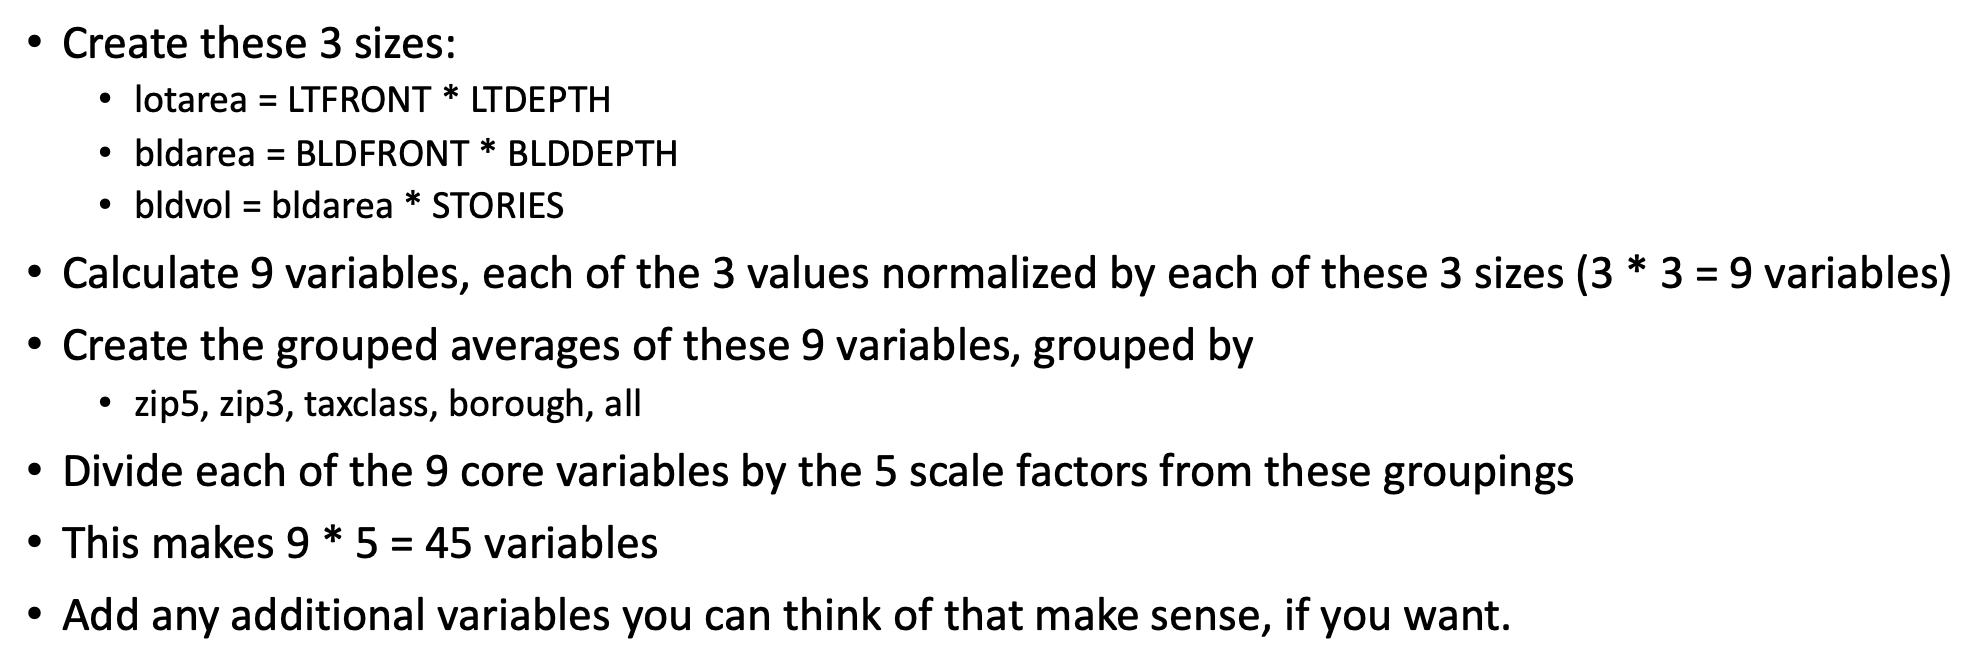

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070994 entries, 0 to 1070993
Data columns (total 33 columns):
RECORD      1070994 non-null category
BBLE        1070994 non-null object
B           1070994 non-null category
BLOCK       1070994 non-null category
LOT         1070994 non-null category
EASEMENT    4636 non-null object
OWNER       1039249 non-null object
BLDGCL      1070994 non-null object
TAXCLASS    1070994 non-null object
LTFRONT     1070994 non-null object
LTDEPTH     1070994 non-null object
EXT         354305 non-null object
STORIES     1070994 non-null object
FULLVAL     1070994 non-null float64
AVLAND      1070994 non-null float64
AVTOT       1070994 non-null float64
EXLAND      1070994 non-null float64
EXTOT       1070994 non-null float64
EXCD1       638488 non-null category
STADDR      1070318 non-null object
ZIP         1070994 non-null object
EXMPTCL     15579 non-null object
BLDFRONT    1070994 non-null object
BLDDEPTH    1070994 non-null object
AVLAND2     282

In [17]:
df['zip3'] = df.ZIP.str[:3]
df['lotarea']=df['LTFRONT']*df['LTDEPTH']
df['bldarea']=df['BLDFRONT']*df['BLDDEPTH']
df['bldvol']=df['bldarea']*df['STORIES']

TypeError: can't multiply sequence by non-int of type 'str'

In [ ]:
from sklearn.preprocessing import Normalizer
new_cols=['lotarea','bldarea','bldvol']
norm_vols=['FULLVAL','AVLAND', 'AVTOT']
for i in norm_vols:
    for j in new_cols:
        df[i+'_'+j]=preprocessing.normalize(df.i,df.j)


### build model

Understand the problem: fraud mode, data…

Build special variables that look for the fraud mode, some variables using entities and groupings

Scale the variables, minimize dimensionality
Use Z scaling, PCA, ask experts…
Model variables are the z scores or rankings

Build models:
Combine the model variables with a heuristic algorithm:
sum of absolute z scores, z scores squared, max/mins…
Use an autoencoder, and the fraud score is the reconstruction error
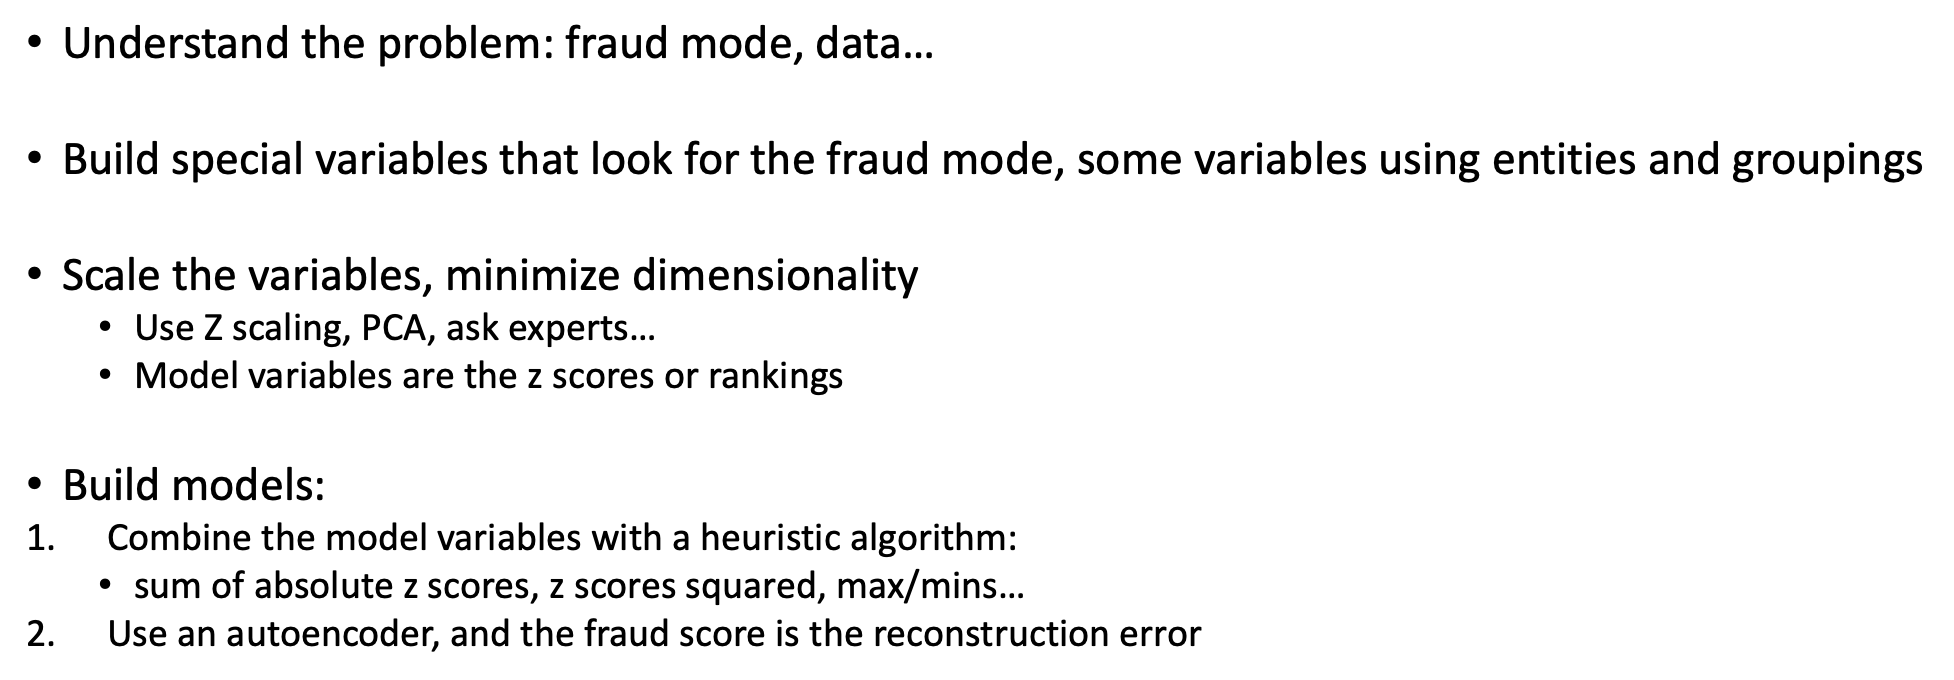